In [9]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

(371, 280)


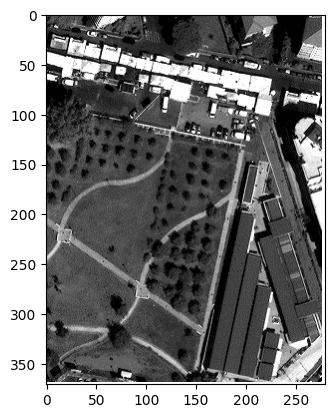

In [10]:
img = cv2.imread("Q2.png",0).astype(np.uint8)
print(img.shape)
plt.imshow(img, cmap='gray')

In [11]:
def glcm(img,pos):
  glcm = np.zeros([256,256])
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      init_val = img[i,j]
      try:
        target = img[i+pos[0],j+pos[1]]
      except IndexError:
        continue
      glcm[init_val,target]+=1
  glcm = glcm/np.sum(glcm)
  return glcm

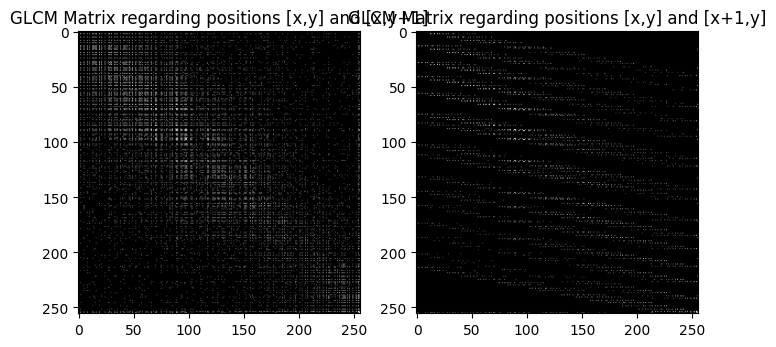

In [12]:
glcm1 = glcm(img,[0,1])
glcm2 = glcm(img,[1,0])

fig = plt.figure(figsize=(8, 8))
fig.add_subplot(1,2,1)
plt.imshow(np.log(glcm1+1e-6), cmap='gray')
plt.title("GLCM Matrix regarding positions [x,y] and [x,y+1]")

fig.add_subplot(1,2,2)
plt.imshow(np.log(glcm2+1e-6), cmap='gray')
plt.title("GLCM Matrix regarding positions [x,y] and [x+1,y]")

plt.show()

In [35]:
def homogeneity(p):
  h = 0
  for i in range(256):
    for j in range(256):
      h+=p[i,j]/(1+(i-j)**2)
  return h


def dissimilarity(p):
  h = 0
  for i in range(256):
    for j in range(256):
      h+=p[i,j]*abs(i-j)
  return h

def contrast(p):
  h = 0
  for i in range(256):
    for j in range(256):
      h+=p[i,j]*(i-j)**2
  return h

def asm(p):
  h = 0
  for i in range(256):
    for j in range(256):
      h+=p[i,j]**2
  return h

def entropy(p):
  h = 0
  for i in range(256):
    for j in range(256):
      if p[i,j]!=0:
        h+=p[i,j]*(-np.log(p[i,j]))
  return h

def mean(p,i):
  h = 0
  for j in range(256):
    h+=p[i,j]*j
  return h

def sigma(p,i):
  h = 0
  for j in range(256):
    m = mean(p,j)
    h+=p[i,j]*(j-m)**2
  return np.sqrt(h)

def correlation(p):
  h = 0
  for i in range(256):
    for j in range(256):
      if sigma(p,i)!=0 and sigma(p,j)!=0:
        h+=p[i,j]*(i-mean(p,i))*(j-mean(p,j))/(sigma(p,i)*sigma(p,j))
  return h

In [ ]:
p = glcm2
print("homogeneity: "+str(homogeneity(p)))
print("dissimilarity: "+str(dissimilarity(p)))
print("contrast: "+str(contrast(p)))
print("ASM: "+str(asm(p)))
print("Energy: "+str(np.sqrt(asm(p))))
print("Entropy: "+str(entropy(p)))


homogeneity: 0.2699168220549505
dissimilarity: 17.936235521235528
contrast: 1140.5635714285736
ASM: 0.017282180684545245
Energy: 0.13146170805426668
Entropy: 5.492108767495945


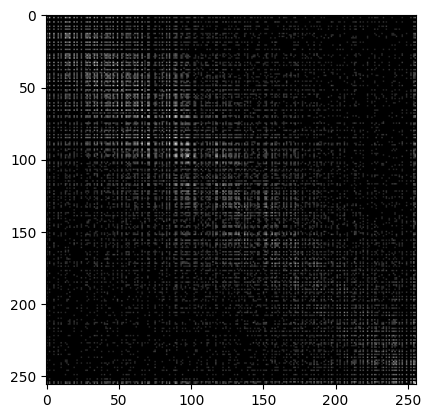

In [28]:
from skimage.feature import graycomatrix, graycoprops
glcm = graycomatrix(img, distances=[1], angles=[0], levels=256,symmetric=True, normed=True)
plt.imshow(np.log(glcm[:,:,0,0]+1e-6), cmap='gray')

In [34]:
print("homogeneity: "+str(graycoprops(glcm, 'homogeneity')[0,0]))
print("dissimilarity: "+str(graycoprops(glcm, 'dissimilarity')[0,0]))
print("contrast: "+str(graycoprops(glcm, 'contrast')[0,0]))
print("ASM: "+str(graycoprops(glcm, 'ASM')[0,0]))
print("Energy: "+str(graycoprops(glcm, 'energy')[0,0]))
print("Correlation: "+str(graycoprops(glcm, 'correlation')[0,0]))

homogeneity: 0.23796135073009814
dissimilarity: 19.91426832449352
contrast: 1339.4525113758227
ASM: 0.008834542932709598
Energy: 0.09399224932253508
Correlation: 0.8484730535024193
